## Function to Plot Spectrum in LAMOST ##

* __only support data release 8__  
( including image smooth processing
* __Warning: the unit of Flux is uncertain__

In [1]:
import math
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import numpy as np
from astropy.io import fits

import scipy.interpolate as spi
from sklearn.preprocessing import MinMaxScaler
import cv2

from astroquery.sdss import SDSS

In [2]:
elines = {
    3727.0:'O II',
    3728.3:'O II',
    4364.4:'O III',
    4960.2:'O III',
    5008.2:'O III',
    8498.0:'Ca II',
    8542.0:'Ca II',
    8662.0:'Ca II',
    8929.0:'Ca II',
    9572.0:'Ca II'
};
fe_II_lines = {
    3277.0:'Fe II',
    4175.0:'Fe II',
    4178.0:'Fe II',
    4234.0:'Fe II',
    4297.0:'Fe II',
    4303.0:'Fe II',
    4388.0:'Fe II',
    4417.0:'Fe II',
    4492.0:'Fe II',
    4520.0:'Fe II',
    4549.0:'Fe II',
    4556.0:'Fe II',
    4584.0:'Fe II',
    4630.0:'Fe II',
    4924.0:'Fe II',
    5021.0:'Fe II',
    5175.0:'Fe II/Mg I blend',
    5198.0:'Fe II',
    5234.0:'Fe II',
    5276.0:'Fe II',
    5285.0:'Fe II',
    5316.0:'Fe II',
    5363.0:'Fe II',
    5426.0:'Fe II',
    5534.0:'Fe II',
    5991.0:'Fe II',
    6240.0:'Fe II',
    6249.0:'Fe II',
    6318.0:'Fe II',
    6385.0:'Fe II',
    6457.0:'Fe II',
    6493.0:'Fe II',
    6516.0:'Fe II',
    7713.0:'Fe II',
    9999.0:'Fe II'
};


fe_I_lines = {
    3407.5:'Fe I',
    3441:'Fe I',
    3465:'Fe I',
    3475:'Fe I',
    3490:'Fe I',
    3526:'Fe I',
    3565:'Fe I',
    3608:'Fe I',
    3631:'Fe I',
    3722:'Fe I',
    3749:'Fe I',
    3824:'Fe I',
    3856:'Fe I',
    3899:'Fe I',
    4045:'Fe I',
    4071:'Fe I',
    4133:'Fe I',
    4143:'Fe I',
    4250:'Fe I',
    4260:'Fe I',
    4272:'Fe I',
    4308:'Fe I',
    4325:'Fe I',
    4383:'Fe I',
    4404:'Fe I',
    4427:'Fe I',
    4871:'Fe I',
    4920:'Fe I',
    5269.5:'Fe I',
    5328:'Fe I',
    5397:'Fe I',
    5429:'Fe I',
    5497:'Fe I'
};

alines = {
    
    
    3832:'Mg I',
    3843:'Mg I',
    3933.7:'Ca II K',
    3968.5:'Ca II H',
    
    3970:r'H$\epsilon$',

    3888:'He',
    3891:r'H$\zeta$',
    4026:'He',
    4101.7:r'H$\delta$',
    4143:'He',
    4226.73:'Ca I',
    4340.4:r'H$\gamma$',
    4388:'He',
    4455:'Ca I',
    4471:'He',
    4481:'Mg I doublet',
    4861.3:r'H$\beta$',
    4922:'He',
    5015:'He',
    
    5167:'Mg I b Triplet',
    5172:'Mg I b Triplet',
    5183:'Mg I b Triplet',
    5207:'Cr I',
    5528:'Mg I',
    5582:'Ca I',
    5711:'Mg I',
    5876:'He',
    5893:'Na D Doublet',
    
    6162:'Ca I',
    6439:'Ca I',
    6562.7:r'H$\alpha$',
     
    7691:'Mg I',
    
    8498:'Ca II IR Triplet',
    8542:'Ca II IR Triplet',
    8662:'Ca II IR Triplet'
    
};


In [3]:
emission_lines = [list(elines.keys()) ,list(elines.values())]
absorption_lines = [list(alines.keys()) ,list(alines.values())]
Fe_I_lines = [list(fe_I_lines.keys()) ,list(fe_I_lines.values())]
Fe_II_lines = [list(fe_II_lines.keys()) ,list(fe_II_lines.values())]

In [4]:
def lines_set(lines , z , color , xmin , xmax):
    if z == -9999:
        delta_z = 0
    else:
        delta_z = z
    for i in range(0,len(lines[0])):
        plt.axvline(x = lines[0][i] / (delta_z + 1), color = color, linestyle='--', linewidth = 0.7)
        if xmin < lines[0][i] / (delta_z + 1) < xmax:
            plt.text(x = lines[0][i] / (delta_z + 1), 
                     y = (1 - i / len(lines[0])), 
                     s = lines[1][i],
                     color = color,
                     rotation = - 15,
                     fontsize = 12)

In [5]:
def FitsPlot(file,
             xmin = 3500,
             xmax = 9500,
             zchange = -9999,
             pattern = 0,
             a = 5,
             IVAR = True,
             lines = True,
             Fe_I_lines = False,
             Fe_II_lines = False
            ):
    #part A
    plt.figure(figsize=(16, 16),dpi=80)#调整绘制的图片的比例
    axes = plt.subplot(211)
    axes.tick_params(axis="both", which="major", direction="out", length = 10)
    axes.tick_params(axis="both", which="minor", direction="out", length = 5)
    axes.xaxis.set_minor_locator(MultipleLocator(100))
    axes.xaxis.set_major_locator(MultipleLocator(500))
    axes.set_xlim(xmin , xmax)

    file_fits = fits.open(file)
    if lines == True:
        if zchange == -9999:
            z = file_fits[0].header['Z']
            lines_set(emission_lines , z , 'green' , xmin , xmax)
            lines_set(absorption_lines , z , 'red' , xmin , xmax)
        
        else:
            lines_set(emission_lines , zchange , 'green' , xmin , xmax)
            lines_set(absorption_lines , zchange , 'red' , xmin , xmax)
            
    if Fe_I_lines == True:
        if zchange == -9999:
            z = file_fits[0].header['Z']
            lines_set(Fe_I_lines , z , 'purple' , xmin , xmax)
        
        else:
            lines_set(Fe_I_lines , z , 'purple' , xmin , xmax)
            
    if Fe_II_lines == True:
        if zchange == -9999:
            z = file_fits[0].header['Z']
            lines_set(Fe_II_lines , z , 'orange' , xmin , xmax)
        
        else:
            lines_set(Fe_II_lines , 'orange' , xmin , xmax)

    X_Original = file_fits[1].data[0].field('WAVELENGTH')[(xmin < file_fits[1].data[0].field('WAVELENGTH'))
                                           &(file_fits[1].data[0].field('WAVELENGTH') < xmax)]
    Y_Original = file_fits[1].data[0].field('FLUX')[(xmin < file_fits[1].data[0].field('WAVELENGTH'))
                                           &(file_fits[1].data[0].field('WAVELENGTH') < xmax)]
    
    X = []
    Y = []
    
    #原始数据绘图
    if pattern == 0: 
        Y = Y_Original
        X = X_Original
        
    #数据平均化绘图
    elif pattern == 1:
        for i in range(0 , len(Y_Original) - a + 1):
            Y.append(np.average(Y_Original[i : i + a]))
            X.append(np.average(X_Original[i : i + a]))
    
    #三阶样条插值后高斯滤波绘图
    elif pattern == 2:
        ipo = spi.splrep(X_Original , Y_Original , k = 3)
        X = X_Original
        Y = spi.splev(X, ipo)
        Y = cv2.GaussianBlur(src = Y, ksize = (29, 29), sigmaX = 5)
        
    else:
        print('Pattern is in [0,2]')
    
    #Y的归一化处理
    Y = (Y - min(Y))/(max(Y) - min(Y))

    
    plt.plot(X, Y, color='blue', linewidth = 1)#按照之前的XY以蓝色、线宽0.5来绘制
    plt.title(file_fits[0].header['FILENAME'])
    plt.xlabel(r'Wavelength ($\rm{\AA}$)')#绘制x轴
    plt.ylabel(r'Flux (relative)')#绘制y轴
    
    
    #part B
    #信噪比
    if IVAR == True:
        axes2 = plt.subplot(212)
        axes2.tick_params(axis="both", which="major", direction="out", length = 10)
        axes2.tick_params(axis="both", which="minor", direction="out", length = 5)
        axes2.xaxis.set_minor_locator(MultipleLocator(100))
        axes2.xaxis.set_major_locator(MultipleLocator(500))
        axes2.set_xlim(xmin , xmax)
        ivar = file_fits[1].data[0].field('IVAR')[(xmin < file_fits[1].data[0].field('WAVELENGTH'))
                                                  &(file_fits[1].data[0].field('WAVELENGTH') < xmax)]
        signal_noise = np.sqrt(ivar) * Y_Original
        plt.plot(X , signal_noise , color = 'blue' , linewidth = 0.7)
        plt.title('SNR')
    plt.show()
    

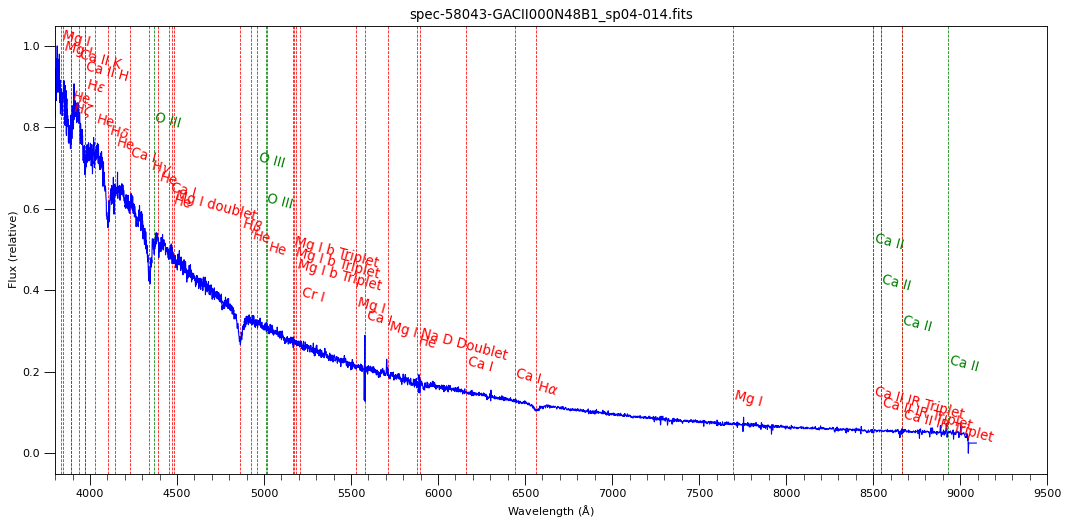

In [6]:
FitsPlot(r'C:\Users\Administrator\Desktop\大创\Data\temp\test\WDJ000103.34+483843.86\593004014\spec-58043-GACII000N48B1_sp04-014.fits.gz',
         xmin = 3800,xmax =9500, pattern = 0,IVAR = False, lines = True)

In [ ]:
old_elines = {
    1033.30:'OVI',
    1216.0 : 'LyA',
    1239.42:'NV',
    1305.53:'OI',
    1335.52:'CII',
    1400.0 : 'SIV+OIV',
    1549.0 : 'CIV',
    1640.0 : 'HeII',
    1909.0 : 'CIII',
    2326.0 : 'CII',
    2800.0 : 'Mg',
    3346.79:'NeV',
    3426.85:'NeV',
    3727. : 'OII',
    3728.3:'OII',
    3869.7867 : 'NeIII',
    4102.89 : 'Hdelta',
    4341.6803 : 'Hgamma',
    4364.3782 : 'OIII',
    4862.6778 : 'Hbeta',
    4960.2140 : 'OIII',
    5008.1666 : 'OIII',
    5876.0 : 'HeI',
    6301.9425 : 'OI',
    6549.7689 : 'NII',
    6564.6127 : 'Halpha',
    6585.1583 : 'NII',
    6718.1642 : 'SII',
    6732.5382 : 'SII',
    7137.6370 : 'ArIII'
};
old_alines = {
    3728.30:'OII',
    3889.00:'HeI',
    3934.78:'CaK',
    3969.59:'CaH',
    3971.19:'He',
    4072.30:'SII',
    4102.89:'Hd',
    4227.92:'CaI',
    4305.61:'G',
    4341.68:'Hc',
    4364.44:'OIII',
    4862.68:'Hb',
    4932.60:'OIII',
    4960.30:'OIII',
    5008.24:'OIII',
    5176.70:'Mg',
    5895.60:'Na',
    6302.05:'OI',
    6365.54:'OI',
    6529.03:'NI',
    6549.86:'NII',
    6564.61:'Ha',
    6585.27:'NII',
    6718.29:'SII',
    6732.67:'SII',
    8500.35:'Ca',
    8544.44:'Ca',
    8664.52:'Ca'
};